## CS4287 - Neural Network
### Assignment 1 - 4th Year Semester 1 2024

Adam Collins: 21332967

Italo da Silva: 21326312

The Code executes to the end without an error. 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [51]:
# Loading cv file and viewing first rows using pandas library
housing_data = pd.read_csv('Melbourne_housing_FULL.csv', low_memory=False) 

# Filtering dataset
# Dropping every cell that contains a NaN value
columns = ["Suburb","Rooms","Type","Price","Method","SellerG","Date","Distance","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","CouncilArea","Lattitude","Longtitude","Regionname","Propertycount"]
housing_data = housing_data.dropna(subset=columns)

# Dropping columns that don't contain numbers
housing_data.drop(["Suburb", "Address", "Type", "Method", "SellerG", "CouncilArea", "Regionname", "Date"], inplace=True, axis="columns")
housing_data.head()

,Rooms,Price,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Propertycount
2,2,1035000,2,1,156,79,1900,4019.0
4,3,1465000,3,2,134,150,1900,4019.0
6,4,1600000,3,1,120,142,2014,4019.0
11,3,1876000,4,2,245,210,1910,4019.0
14,2,1636000,2,1,256,107,1890,4019.0


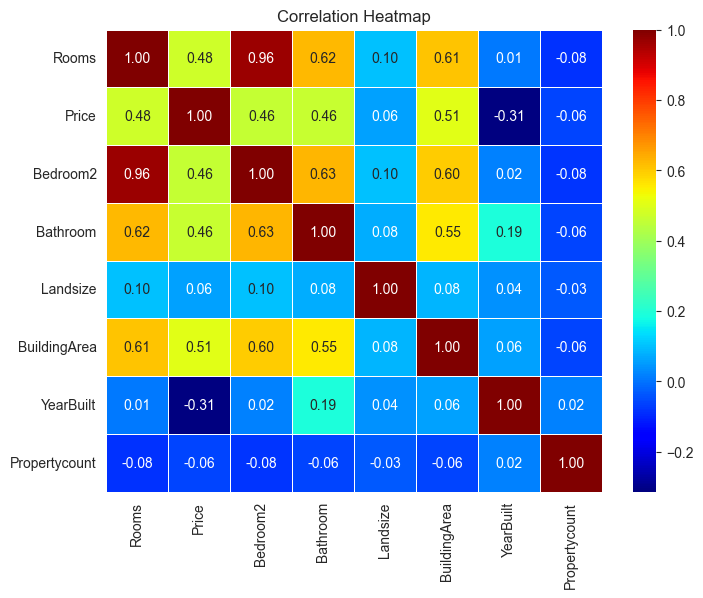

In [52]:
# From sample Assignment 1 provided by the lecturer.

# Dataframe of key attributes
housing_data.corr()

# Correlation matrix
corr_matrix = housing_data.corr()

# Generate Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='jet', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

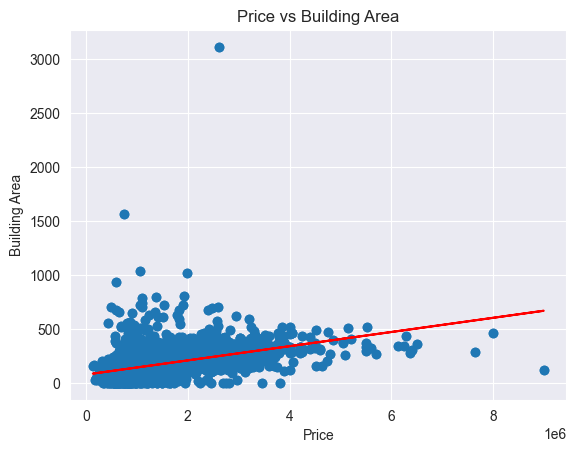

In [60]:
# Draw graph of correlation between Price and Building Area

## Converting the data in the columns to numeric 
housing_data[['Price', 'BuildingArea']] = housing_data[['Price', 'BuildingArea']].apply(pd.to_numeric)

## Reshaping the data to a 2D array in order to plot it in the Linear Regression 
price = housing_data['Price'].values.reshape(-1,1)
building_area = housing_data['BuildingArea'].values.reshape(-1,1)

## Creating a Linear Regression model to predict the data for Building Area based on the Price
reg = LinearRegression().fit(price, building_area)

## Functions to plot the graph
plt.plot(housing_data[['Price']], housing_data[['BuildingArea']], 'o')
plt.plot(housing_data[['Price']], reg.predict(price), 'r')

## Adding labels to the graph
plt.xlabel('Price')
plt.ylabel('Building Area')
plt.title('Price vs Building Area')
plt.show()